In [ ]:
#link KAGGLE - https://www.kaggle.com/rikdifos/credit-card-approval-prediction?select=credit_record.csv

**PROYECTO FINAL CURSO DATA SCIENCE CODERHOUSE 2022**

Trabajaremos sobre un dataset de TARJETAS DE CRÉDITO con el objetivo de definir clusters de clientes centrándonos en la posibilidad de cobro ante los mismos. Entonces, de esta forma, tendremos una cluesterización de clientes que permita a la empresa verificar si éste sera un cliente cumplidor o no.

In [ ]:
#Importamos librerías
import pandas as pd
import numpy as np
import seaborn as sns
from seaborn import distplot
import matplotlib.pyplot as plt

In [ ]:
#Leemos los dataset
credit = pd.read_csv("/content/credit.csv")
credit

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C
...,...,...,...
1048570,5150487,-25,C
1048571,5150487,-26,C
1048572,5150487,-27,C
1048573,5150487,-28,C


In [ ]:
aplication = pd.read_csv("/content/application.csv")
aplication

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438552,6840104,M,N,Y,0,135000.0,Pensioner,Secondary / secondary special,Separated,House / apartment,-22717,365243,1,0,0,0,NaN,1.0
438553,6840222,F,N,N,0,103500.0,Working,Secondary / secondary special,Single / not married,House / apartment,-15939,-3007,1,0,0,0,Laborers,1.0
438554,6841878,F,N,N,0,54000.0,Commercial associate,Higher education,Single / not married,With parents,-8169,-372,1,1,0,0,Sales staff,1.0
438555,6842765,F,N,Y,0,72000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-21673,365243,1,0,0,0,NaN,2.0


In [ ]:
#Unimos los dataset
df = pd.merge(aplication,credit,on="ID")
df

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,0,C
1,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-1,C
2,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-2,C
3,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-3,C
4,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-4,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777710,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,-9188,-1193,1,0,0,0,Laborers,1.0,-9,0
777711,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,-9188,-1193,1,0,0,0,Laborers,1.0,-10,2
777712,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,-9188,-1193,1,0,0,0,Laborers,1.0,-11,1
777713,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,-9188,-1193,1,0,0,0,Laborers,1.0,-12,0


In [ ]:
df.drop(df.loc[df['MONTHS_BALANCE']!= 0].index, inplace=True)

In [ ]:
df

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,0,C
16,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,0,C
31,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,0,C
61,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,0,0
71,5008810,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,0,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777622,5149828,M,Y,Y,0,315000.0,Working,Secondary / secondary special,Married,House / apartment,-17348,-2420,1,0,0,0,Managers,2.0,0,5
777634,5149834,F,N,Y,0,157500.0,Commercial associate,Higher education,Married,House / apartment,-12387,-1325,1,0,1,1,Medicine staff,2.0,0,C
777658,5149838,F,N,Y,0,157500.0,Pensioner,Higher education,Married,House / apartment,-12387,-1325,1,0,1,1,Medicine staff,2.0,0,C
777691,5150049,F,N,Y,0,283500.0,Working,Secondary / secondary special,Married,House / apartment,-17958,-655,1,0,0,0,Sales staff,2.0,0,2


En los siguientes pasos se realizará un análisis EDA para identificar variables y su comportamiento

In [ ]:
#Vemos resumen del dataset
df.describe().round().T

,count,mean,std,min,25%,50%,75%,max
ID,24672.0,5078863.0,41535.0,5008804.0,5045511.0,5069454.0,5115437.0,5150487.0
CNT_CHILDREN,24672.0,0.0,1.0,0.0,0.0,0.0,1.0,19.0
AMT_INCOME_TOTAL,24672.0,187075.0,102095.0,27000.0,121500.0,157500.0,225000.0,1575000.0
DAYS_BIRTH,24672.0,-16023.0,4182.0,-25152.0,-19453.0,-15653.0,-12542.0,-7489.0
DAYS_EMPLOYED,24672.0,58970.0,137409.0,-15713.0,-3170.0,-1546.0,-401.0,365243.0
FLAG_MOBIL,24672.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
FLAG_WORK_PHONE,24672.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
FLAG_PHONE,24672.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
FLAG_EMAIL,24672.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
CNT_FAM_MEMBERS,24672.0,2.0,1.0,1.0,2.0,2.0,3.0,20.0


In [ ]:
#Reemplazo los valores str por int en "ACCOUNT STATUS"
df= df.replace({"C":"6","X":"7"})
df

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,0,6
16,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,0,6
31,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,0,6
61,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,0,0
71,5008810,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777622,5149828,M,Y,Y,0,315000.0,Working,Secondary / secondary special,Married,House / apartment,-17348,-2420,1,0,0,0,Managers,2.0,0,5
777634,5149834,F,N,Y,0,157500.0,Commercial associate,Higher education,Married,House / apartment,-12387,-1325,1,0,1,1,Medicine staff,2.0,0,6
777658,5149838,F,N,Y,0,157500.0,Pensioner,Higher education,Married,House / apartment,-12387,-1325,1,0,1,1,Medicine staff,2.0,0,6
777691,5150049,F,N,Y,0,283500.0,Working,Secondary / secondary special,Married,House / apartment,-17958,-655,1,0,0,0,Sales staff,2.0,0,2


In [ ]:
#Vemos el tamaño
df.shape

(24672, 20)

In [ ]:
#Vemos nombre de columnas
df.columns

Index(['ID', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'MONTHS_BALANCE',
       'STATUS'],
      dtype='object')

In [ ]:
#Cambiamos nombres de columnas
df = df.rename(columns={"CODE_GENDER":"GENDER", "FLAG_OWN_CAR":"CAR","FLAG_OWN_REALTY":"PROPERTIES","CNT_CHILDREN":"CHILDREN", "AMT_INCOME_TOTAL":"ANNUAL_INCOME", "NAME_INCOME_TYPE":"INCOME_CATEGORY", "NAME_EDUCATION_TYPE":"EDUCATION_LEVEL", "NAME_FAMILY_STATUS":"MARITAL_STATUS", "NAME_HOUSING_TYPE":"WAY_OF_LIVING", "DAYS_BIRTH":"BIRTHDAY", "DAYS_EMPLOYED":"START_DAY", "FLAG_MOBIL":"MOBILE_PHONE", "FLAG_WORK_PHONE":"WORK_PHONE", "FLAG_PHONE": "PHONE", "FLAG_EMAIL": "EMAIL", "OCCUPATION_TYPE":"OCCUPATION", "CNT_FAM_MEMBERS":"FAMILY_SIZE", "MONTHS_BALANCE":"MONTHS_OF_BALANCE", "STATUS":"ACCOUNT_STATUS"})
df

,ID,GENDER,CAR,PROPERTIES,CHILDREN,ANNUAL_INCOME,INCOME_CATEGORY,EDUCATION_LEVEL,MARITAL_STATUS,WAY_OF_LIVING,BIRTHDAY,START_DAY,MOBILE_PHONE,WORK_PHONE,PHONE,EMAIL,OCCUPATION,FAMILY_SIZE,MONTHS_OF_BALANCE,ACCOUNT_STATUS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,0,6
16,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,0,6
31,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,0,6
61,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,0,0
71,5008810,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777622,5149828,M,Y,Y,0,315000.0,Working,Secondary / secondary special,Married,House / apartment,-17348,-2420,1,0,0,0,Managers,2.0,0,5
777634,5149834,F,N,Y,0,157500.0,Commercial associate,Higher education,Married,House / apartment,-12387,-1325,1,0,1,1,Medicine staff,2.0,0,6
777658,5149838,F,N,Y,0,157500.0,Pensioner,Higher education,Married,House / apartment,-12387,-1325,1,0,1,1,Medicine staff,2.0,0,6
777691,5150049,F,N,Y,0,283500.0,Working,Secondary / secondary special,Married,House / apartment,-17958,-655,1,0,0,0,Sales staff,2.0,0,2


In [ ]:
df.columns

Index(['ID', 'GENDER', 'CAR', 'PROPERTIES', 'CHILDREN', 'ANNUAL_INCOME',
       'INCOME_CATEGORY', 'EDUCATION_LEVEL', 'MARITAL_STATUS', 'WAY_OF_LIVING',
       'BIRTHDAY', 'START_DAY', 'MOBILE_PHONE', 'WORK_PHONE', 'PHONE', 'EMAIL',
       'OCCUPATION', 'FAMILY_SIZE', 'MONTHS_OF_BALANCE', 'ACCOUNT_STATUS'],
      dtype='object')

Se cambió el nombre de las columnas para una mejor identificación de las variables. 
A continuación, se hará una breve descripción de ellas:

**ID:** Numero de cliente

**GENDER:**	Género del cliente.

**CAR**	posee o no auto

**PROPERTIES**	posee propiedades

**CHILDREN**	Numero de niños	

**ANNUAL INCOME** Ingresos anuales

**INCOME CATEGORY**	Categoría de ingresos	

**EDUCATION TYPE** Nivel de Educación	

**MARITAL STATUS**	Estado civil	

**WAY OF LIVING**	Modo de vivir	

**BIRTHDAY**	Cumpleaños - Cuenta hacia atrás desde el día actual (0), -1 significa ayer,etc.

**START DAY**	Fecha de inicio del empleo	Contar hacia atrás desde el día actual (0). Si es positivo, significa la persona actualmente desempleada.

**MOBILE PHONE** Posee telefono movil

**WORK PHON**E	Posee teléfono de trabajo

**PHONE**	Posee teléfono

**E-MAIL** hay un correo electronico	

**OCCUPATION**	Ocupación	

**FAMILY SIZE**	Tamaño de la familia	

**MONTHS OF BALANCE**	El mes de los datos extraídos es el punto de partida, al revés, 0 es el mes actual, -1 es el mes anterior, etc.

**ACCOUNT STATUS**
0: 1-29 días de atraso 
1: 30-59 días de atraso 
2: 60-89 días de atraso 
3: 90-119 días de atraso 
4: 120-149 días de atraso 
5: Deudas atrasadas o incobrables, canceladas por más de 150 días 
C: pagado ese mes 
X: No hay préstamo para el mes

In [ ]:
#Modificamos los valores de ACCOUNT STATUS para determinar si la cuenta es "COBRABLE" = 1 o "INCOBRABLE" = 0

#0: 1-29 días de atraso 
#1: 30-59 días de atraso 
#2: 60-89 días de atraso  
#3: 90-119 días de atraso 
#4: 120-149 días de atraso 
#5: Deudas atrasadas o incobrables,canceladas por más de 150 días
#6: pagado ese mes 
#7: No hay préstamo para el mes

df.loc[df['ACCOUNT_STATUS'] == '0', 'ACCOUNT_STATUS'] = '1'
df.loc[df['ACCOUNT_STATUS'] == '1', 'ACCOUNT_STATUS'] = '1'
df.loc[df['ACCOUNT_STATUS'] == '2', 'ACCOUNT_STATUS'] = '1'
df.loc[df['ACCOUNT_STATUS'] == '6', 'ACCOUNT_STATUS'] = '1'
df.loc[df['ACCOUNT_STATUS'] == '3', 'ACCOUNT_STATUS'] = '1'
df.loc[df['ACCOUNT_STATUS'] == '4', 'ACCOUNT_STATUS'] = '0'
df.loc[df['ACCOUNT_STATUS'] == '5', 'ACCOUNT_STATUS'] = '0'
df.loc[df['ACCOUNT_STATUS'] == '7', 'ACCOUNT_STATUS'] = '0'

In [ ]:
df.value_counts("ACCOUNT_STATUS")

ACCOUNT_STATUS
1    20121
0     4551
dtype: int64

In [ ]:
#Vemos tipos de datos de cada columna
df.dtypes

ID                     int64
GENDER                object
CAR                   object
PROPERTIES            object
CHILDREN               int64
ANNUAL_INCOME        float64
INCOME_CATEGORY       object
EDUCATION_LEVEL       object
MARITAL_STATUS        object
WAY_OF_LIVING         object
BIRTHDAY               int64
START_DAY              int64
MOBILE_PHONE           int64
WORK_PHONE             int64
PHONE                  int64
EMAIL                  int64
OCCUPATION            object
FAMILY_SIZE          float64
MONTHS_OF_BALANCE      int64
ACCOUNT_STATUS        object
dtype: object

In [ ]:
#Vemos info sobre null
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24672 entries, 0 to 777701
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 24672 non-null  int64  
 1   GENDER             24672 non-null  object 
 2   CAR                24672 non-null  object 
 3   PROPERTIES         24672 non-null  object 
 4   CHILDREN           24672 non-null  int64  
 5   ANNUAL_INCOME      24672 non-null  float64
 6   INCOME_CATEGORY    24672 non-null  object 
 7   EDUCATION_LEVEL    24672 non-null  object 
 8   MARITAL_STATUS     24672 non-null  object 
 9   WAY_OF_LIVING      24672 non-null  object 
 10  BIRTHDAY           24672 non-null  int64  
 11  START_DAY          24672 non-null  int64  
 12  MOBILE_PHONE       24672 non-null  int64  
 13  WORK_PHONE         24672 non-null  int64  
 14  PHONE              24672 non-null  int64  
 15  EMAIL              24672 non-null  int64  
 16  OCCUPATION         17

In [ ]:
#Eliminamos NaN
df.isnull().sum()

ID                      0
GENDER                  0
CAR                     0
PROPERTIES              0
CHILDREN                0
ANNUAL_INCOME           0
INCOME_CATEGORY         0
EDUCATION_LEVEL         0
MARITAL_STATUS          0
WAY_OF_LIVING           0
BIRTHDAY                0
START_DAY               0
MOBILE_PHONE            0
WORK_PHONE              0
PHONE                   0
EMAIL                   0
OCCUPATION           7629
FAMILY_SIZE             0
MONTHS_OF_BALANCE       0
ACCOUNT_STATUS          0
dtype: int64

In [ ]:
df_limpio = df.dropna()
df_limpio

,ID,GENDER,CAR,PROPERTIES,CHILDREN,ANNUAL_INCOME,INCOME_CATEGORY,EDUCATION_LEVEL,MARITAL_STATUS,WAY_OF_LIVING,BIRTHDAY,START_DAY,MOBILE_PHONE,WORK_PHONE,PHONE,EMAIL,OCCUPATION,FAMILY_SIZE,MONTHS_OF_BALANCE,ACCOUNT_STATUS
31,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,0,1
61,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,0,1
71,5008810,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,0,1
98,5008811,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,0,1
188,5008815,M,Y,Y,0,270000.0,Working,Higher education,Married,House / apartment,-16872,-769,1,1,1,1,Accountants,2.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777622,5149828,M,Y,Y,0,315000.0,Working,Secondary / secondary special,Married,House / apartment,-17348,-2420,1,0,0,0,Managers,2.0,0,0
777634,5149834,F,N,Y,0,157500.0,Commercial associate,Higher education,Married,House / apartment,-12387,-1325,1,0,1,1,Medicine staff,2.0,0,1
777658,5149838,F,N,Y,0,157500.0,Pensioner,Higher education,Married,House / apartment,-12387,-1325,1,0,1,1,Medicine staff,2.0,0,1
777691,5150049,F,N,Y,0,283500.0,Working,Secondary / secondary special,Married,House / apartment,-17958,-655,1,0,0,0,Sales staff,2.0,0,1


In [ ]:
#Balanceamos el dataset
df_limpio.value_counts("ACCOUNT_STATUS")

ACCOUNT_STATUS
1    13857
0     3186
dtype: int64

In [ ]:
df_limpio.value_counts("ACCOUNT_STATUS")

ACCOUNT_STATUS
1    13857
0     3186
dtype: int64

In [ ]:
df_limpio.value_counts("MARITAL_STATUS")

MARITAL_STATUS
Married                 11846
Single / not married     2373
Civil marriage           1448
Separated                 986
Widow                     390
dtype: int64

In [ ]:
#Vemos cual es la ocupación mas popular
df_limpio.value_counts("OCCUPATION")

OCCUPATION
Laborers                 4293
Core staff               2381
Sales staff              2328
Managers                 2008
Drivers                  1504
High skill tech staff     950
Accountants               853
Medicine staff            796
Cooking staff             449
Security staff            406
Cleaning staff            385
Private service staff     235
Low-skill Laborers        123
Secretaries                98
Waiters/barmen staff       88
HR staff                   53
Realty agents              47
IT staff                   46
dtype: int64

In [ ]:
#Vemos cual es la forma de vida mas popular
df_limpio.value_counts("WAY_OF_LIVING")

WAY_OF_LIVING
House / apartment      14981
With parents             980
Municipal apartment      559
Rented apartment         295
Office apartment         132
Co-op apartment           96
dtype: int64

In [ ]:
#Vemos cual es el nivel de educación mas popular
df_limpio.value_counts("EDUCATION_LEVEL")

EDUCATION_LEVEL
Secondary / secondary special    11437
Higher education                  4804
Incomplete higher                  660
Lower secondary                    132
Academic degree                     10
dtype: int64

In [ ]:
#Vemos cual es la categoria de ingresos mas popular
df_limpio.value_counts("INCOME_CATEGORY")

INCOME_CATEGORY
Working                 10601
Commercial associate     4839
State servant            1582
Pensioner                  13
Student                     8
dtype: int64

In [ ]:
df_limpio.value_counts("ANNUAL_INCOME").sort_index()
df_limpio1 = df_limpio.copy()
df_limpio1

,ID,GENDER,CAR,PROPERTIES,CHILDREN,ANNUAL_INCOME,INCOME_CATEGORY,EDUCATION_LEVEL,MARITAL_STATUS,WAY_OF_LIVING,BIRTHDAY,START_DAY,MOBILE_PHONE,WORK_PHONE,PHONE,EMAIL,OCCUPATION,FAMILY_SIZE,MONTHS_OF_BALANCE,ACCOUNT_STATUS
31,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,0,1
61,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,0,1
71,5008810,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,0,1
98,5008811,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,0,1
188,5008815,M,Y,Y,0,270000.0,Working,Higher education,Married,House / apartment,-16872,-769,1,1,1,1,Accountants,2.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777622,5149828,M,Y,Y,0,315000.0,Working,Secondary / secondary special,Married,House / apartment,-17348,-2420,1,0,0,0,Managers,2.0,0,0
777634,5149834,F,N,Y,0,157500.0,Commercial associate,Higher education,Married,House / apartment,-12387,-1325,1,0,1,1,Medicine staff,2.0,0,1
777658,5149838,F,N,Y,0,157500.0,Pensioner,Higher education,Married,House / apartment,-12387,-1325,1,0,1,1,Medicine staff,2.0,0,1
777691,5150049,F,N,Y,0,283500.0,Working,Secondary / secondary special,Married,House / apartment,-17958,-655,1,0,0,0,Sales staff,2.0,0,1


In [ ]:
df_limpio1= df_limpio1.replace({"M":0,"F":1})
df_limpio1= df_limpio1.replace({"N":0,"Y":1})
df_limpio1= df_limpio1.replace({"Working":0,"Commercial associate":1,"State servant":2,"Pensioner":3,"Student":4})
df_limpio1= df_limpio1.replace({"Secondary / secondary special":0,"Higher education":1,"Incomplete higher":2,"Lower secondary":3,"Academic degree":4})
df_limpio1= df_limpio1.replace({"Single / not married":0,"Married":1,"Civil marriage":2,"Separated":3,"Widow":4})
df_limpio1= df_limpio1.replace({"House / apartment":0,"With parents":1,"Municipal apartment":2,"Rented apartment":3,"Office apartment":4,"Co-op apartment":5})
df_limpio1= df_limpio1.replace({"Laborers":0,"Core staff":1, "Managers":2, "Drivers":3, "High skill tech staff":4, "Accountants":5, "Medicine staff":6, "Cooking staff":7, "Security staff":8, "Cleaning staff":9, "Private service staff":10, "Low-skill Laborers":11,
                                "Secretaries":12, "Waiters/barmen staff":13, "HR staff":14, "Realty agents":15, "IT staff":16, "Sales staff":17})
df_limpio1

,ID,GENDER,CAR,PROPERTIES,CHILDREN,ANNUAL_INCOME,INCOME_CATEGORY,EDUCATION_LEVEL,MARITAL_STATUS,WAY_OF_LIVING,BIRTHDAY,START_DAY,MOBILE_PHONE,WORK_PHONE,PHONE,EMAIL,OCCUPATION,FAMILY_SIZE,MONTHS_OF_BALANCE,ACCOUNT_STATUS
31,5008806,0,1,1,0,112500.0,0,0,1,0,-21474,-1134,1,0,0,0,8,2.0,0,1
61,5008808,1,0,1,0,270000.0,1,0,0,0,-19110,-3051,1,0,1,1,17,1.0,0,1
71,5008810,1,0,1,0,270000.0,1,0,0,0,-19110,-3051,1,0,1,1,17,1.0,0,1
98,5008811,1,0,1,0,270000.0,1,0,0,0,-19110,-3051,1,0,1,1,17,1.0,0,1
188,5008815,0,1,1,0,270000.0,0,1,1,0,-16872,-769,1,1,1,1,5,2.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777622,5149828,0,1,1,0,315000.0,0,0,1,0,-17348,-2420,1,0,0,0,2,2.0,0,0
777634,5149834,1,0,1,0,157500.0,1,1,1,0,-12387,-1325,1,0,1,1,6,2.0,0,1
777658,5149838,1,0,1,0,157500.0,3,1,1,0,-12387,-1325,1,0,1,1,6,2.0,0,1
777691,5150049,1,0,1,0,283500.0,0,0,1,0,-17958,-655,1,0,0,0,17,2.0,0,1


In [ ]:
#Se generan rangos para la columna "Annual Income" para facilitar el análisis

#REFERENCIAS: 1(entre  0y 100.000), 2(entre  100Ky 200K), 3(entre  200Ky 300K), 4(entre 300Ky 400K), 5(entre  400Ky 500K), 6(entre  500Ky 600K), 7(entre  600Ky 700K)
#8(entre  700Ky 800K), 9(entre  800Ky 900K), 10(entre  900Ky 1M), 11(entre 1M y 1.5M), 12(entre 1.5M y 2M)

conditions = [
    (df_limpio["ANNUAL_INCOME"]> 0) & (df_limpio["ANNUAL_INCOME"]<= 100000),
    (df_limpio["ANNUAL_INCOME"]> 100000) & (df_limpio["ANNUAL_INCOME"]<= 200000),
    (df_limpio["ANNUAL_INCOME"]> 200000) & (df_limpio["ANNUAL_INCOME"]<= 300000),
    (df_limpio["ANNUAL_INCOME"]> 300000) & (df_limpio["ANNUAL_INCOME"]<= 400000),
    (df_limpio["ANNUAL_INCOME"]> 400000) & (df_limpio["ANNUAL_INCOME"]<= 500000),
    (df_limpio["ANNUAL_INCOME"]> 500000) & (df_limpio["ANNUAL_INCOME"]<= 600000),
    (df_limpio["ANNUAL_INCOME"]> 600000) & (df_limpio["ANNUAL_INCOME"]<= 700000), 
    (df_limpio["ANNUAL_INCOME"]> 700000) & (df_limpio["ANNUAL_INCOME"]<= 800000),
    (df_limpio["ANNUAL_INCOME"]> 800000) & (df_limpio["ANNUAL_INCOME"]<= 900000),
    (df_limpio["ANNUAL_INCOME"]> 900000) & (df_limpio["ANNUAL_INCOME"]<= 1000000),
    (df_limpio["ANNUAL_INCOME"]> 1000000) & (df_limpio["ANNUAL_INCOME"]<= 1500000),
    (df_limpio["ANNUAL_INCOME"]> 1500000) & (df_limpio["ANNUAL_INCOME"]<= 2000000)
    ]

values = ("1","2","3","4","5","6","7","8","9","10","11","12")
df_limpio["ANNUAL_INCOME"]= np.select(conditions,values)
df_limpio["ANNUAL_INCOME"].value_counts().sort_index()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


1     1855
10       6
11       6
12       5
2     8296
3     4828
4     1399
5      435
6       62
7       95
8       24
9       32
Name: ANNUAL_INCOME, dtype: int64

In [ ]:
df_limpio

,ID,GENDER,CAR,PROPERTIES,CHILDREN,ANNUAL_INCOME,INCOME_CATEGORY,EDUCATION_LEVEL,MARITAL_STATUS,WAY_OF_LIVING,BIRTHDAY,START_DAY,MOBILE_PHONE,WORK_PHONE,PHONE,EMAIL,OCCUPATION,FAMILY_SIZE,MONTHS_OF_BALANCE,ACCOUNT_STATUS
31,5008806,M,Y,Y,0,2,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,0,1
61,5008808,F,N,Y,0,3,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,0,1
71,5008810,F,N,Y,0,3,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,0,1
98,5008811,F,N,Y,0,3,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,0,1
188,5008815,M,Y,Y,0,3,Working,Higher education,Married,House / apartment,-16872,-769,1,1,1,1,Accountants,2.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777622,5149828,M,Y,Y,0,4,Working,Secondary / secondary special,Married,House / apartment,-17348,-2420,1,0,0,0,Managers,2.0,0,0
777634,5149834,F,N,Y,0,2,Commercial associate,Higher education,Married,House / apartment,-12387,-1325,1,0,1,1,Medicine staff,2.0,0,1
777658,5149838,F,N,Y,0,2,Pensioner,Higher education,Married,House / apartment,-12387,-1325,1,0,1,1,Medicine staff,2.0,0,1
777691,5150049,F,N,Y,0,3,Working,Secondary / secondary special,Married,House / apartment,-17958,-655,1,0,0,0,Sales staff,2.0,0,1


In [ ]:
df_limpio1

,ID,GENDER,CAR,PROPERTIES,CHILDREN,ANNUAL_INCOME,INCOME_CATEGORY,EDUCATION_LEVEL,MARITAL_STATUS,WAY_OF_LIVING,BIRTHDAY,START_DAY,MOBILE_PHONE,WORK_PHONE,PHONE,EMAIL,OCCUPATION,FAMILY_SIZE,MONTHS_OF_BALANCE,ACCOUNT_STATUS
31,5008806,0,1,1,0,112500.0,0,0,1,0,-21474,-1134,1,0,0,0,8,2.0,0,1
61,5008808,1,0,1,0,270000.0,1,0,0,0,-19110,-3051,1,0,1,1,17,1.0,0,1
71,5008810,1,0,1,0,270000.0,1,0,0,0,-19110,-3051,1,0,1,1,17,1.0,0,1
98,5008811,1,0,1,0,270000.0,1,0,0,0,-19110,-3051,1,0,1,1,17,1.0,0,1
188,5008815,0,1,1,0,270000.0,0,1,1,0,-16872,-769,1,1,1,1,5,2.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777622,5149828,0,1,1,0,315000.0,0,0,1,0,-17348,-2420,1,0,0,0,2,2.0,0,0
777634,5149834,1,0,1,0,157500.0,1,1,1,0,-12387,-1325,1,0,1,1,6,2.0,0,1
777658,5149838,1,0,1,0,157500.0,3,1,1,0,-12387,-1325,1,0,1,1,6,2.0,0,1
777691,5150049,1,0,1,0,283500.0,0,0,1,0,-17958,-655,1,0,0,0,17,2.0,0,1


In [ ]:
#Hacemos variable int
df_limpio["ANNUAL_INCOME"]= df_limpio["ANNUAL_INCOME"].astype(int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
#Hacemos variable int
df_limpio["ACCOUNT_STATUS"]= df_limpio["ACCOUNT_STATUS"].astype(int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
#Corroboramos types
df_limpio.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17043 entries, 31 to 777701
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 17043 non-null  int64  
 1   GENDER             17043 non-null  object 
 2   CAR                17043 non-null  object 
 3   PROPERTIES         17043 non-null  object 
 4   CHILDREN           17043 non-null  int64  
 5   ANNUAL_INCOME      17043 non-null  int64  
 6   INCOME_CATEGORY    17043 non-null  object 
 7   EDUCATION_LEVEL    17043 non-null  object 
 8   MARITAL_STATUS     17043 non-null  object 
 9   WAY_OF_LIVING      17043 non-null  object 
 10  BIRTHDAY           17043 non-null  int64  
 11  START_DAY          17043 non-null  int64  
 12  MOBILE_PHONE       17043 non-null  int64  
 13  WORK_PHONE         17043 non-null  int64  
 14  PHONE              17043 non-null  int64  
 15  EMAIL              17043 non-null  int64  
 16  OCCUPATION         1

In [ ]:
#Transformamos las variables categóricas en numéricas
df_limpio = pd.get_dummies(df_limpio)
df_limpio

,ID,CHILDREN,ANNUAL_INCOME,BIRTHDAY,START_DAY,MOBILE_PHONE,WORK_PHONE,PHONE,EMAIL,FAMILY_SIZE,...,OCCUPATION_Laborers,OCCUPATION_Low-skill Laborers,OCCUPATION_Managers,OCCUPATION_Medicine staff,OCCUPATION_Private service staff,OCCUPATION_Realty agents,OCCUPATION_Sales staff,OCCUPATION_Secretaries,OCCUPATION_Security staff,OCCUPATION_Waiters/barmen staff
31,5008806,0,2,-21474,-1134,1,0,0,0,2.0,...,0,0,0,0,0,0,0,0,1,0
61,5008808,0,3,-19110,-3051,1,0,1,1,1.0,...,0,0,0,0,0,0,1,0,0,0
71,5008810,0,3,-19110,-3051,1,0,1,1,1.0,...,0,0,0,0,0,0,1,0,0,0
98,5008811,0,3,-19110,-3051,1,0,1,1,1.0,...,0,0,0,0,0,0,1,0,0,0
188,5008815,0,3,-16872,-769,1,1,1,1,2.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777622,5149828,0,4,-17348,-2420,1,0,0,0,2.0,...,0,0,1,0,0,0,0,0,0,0
777634,5149834,0,2,-12387,-1325,1,0,1,1,2.0,...,0,0,0,1,0,0,0,0,0,0
777658,5149838,0,2,-12387,-1325,1,0,1,1,2.0,...,0,0,0,1,0,0,0,0,0,0
777691,5150049,0,3,-17958,-655,1,0,0,0,2.0,...,0,0,0,0,0,0,1,0,0,0


In [ ]:
#Vemos las nuevas columnas y su información
df_limpio.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17043 entries, 31 to 777701
Data columns (total 57 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   ID                                             17043 non-null  int64  
 1   CHILDREN                                       17043 non-null  int64  
 2   ANNUAL_INCOME                                  17043 non-null  int64  
 3   BIRTHDAY                                       17043 non-null  int64  
 4   START_DAY                                      17043 non-null  int64  
 5   MOBILE_PHONE                                   17043 non-null  int64  
 6   WORK_PHONE                                     17043 non-null  int64  
 7   PHONE                                          17043 non-null  int64  
 8   EMAIL                                          17043 non-null  int64  
 9   FAMILY_SIZE                                    1

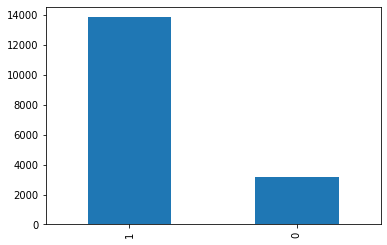

In [ ]:
#Grafico de barras de ACCOUNT STATUS
df_limpio["ACCOUNT_STATUS"].value_counts().plot.bar()

In [ ]:
df_limpio.value_counts("ANNUAL_INCOME").sort_index()

ANNUAL_INCOME
1     1855
2     8296
3     4828
4     1399
5      435
6       62
7       95
8       24
9       32
10       6
11       6
12       5
dtype: int64

In [ ]:
df_limpio["ANNUAL_INCOME"].describe().round()

count    17043.0
mean         2.0
std          1.0
min          1.0
25%          2.0
50%          2.0
75%          3.0
max         12.0
Name: ANNUAL_INCOME, dtype: float64

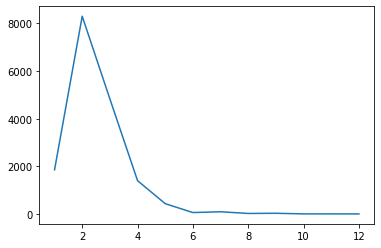

In [ ]:
#Grafico de ANNUAL INCOME
df_limpio["ANNUAL_INCOME"].value_counts().sort_index().plot.line()
#Predominan los salarios entre $100K y $300K

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


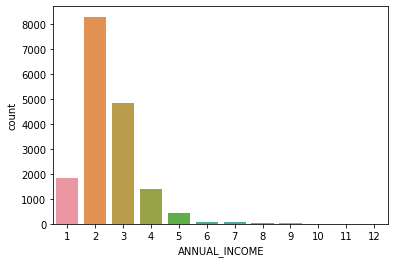

In [ ]:
#Expresado en gráfico de barrras
sns.countplot(df_limpio["ANNUAL_INCOME"])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


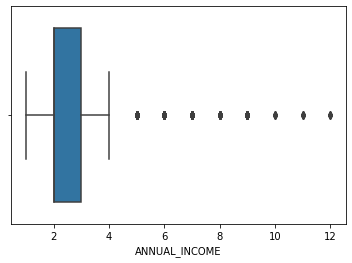

In [ ]:
#Expresado en boxplot
sns.boxplot(df_limpio["ANNUAL_INCOME"], orient="V")

In [ ]:
df_limpio["ANNUAL_INCOME"].value_counts()

2     8296
3     4828
1     1855
4     1399
5      435
7       95
6       62
9       32
8       24
11       6
10       6
12       5
Name: ANNUAL_INCOME, dtype: int64

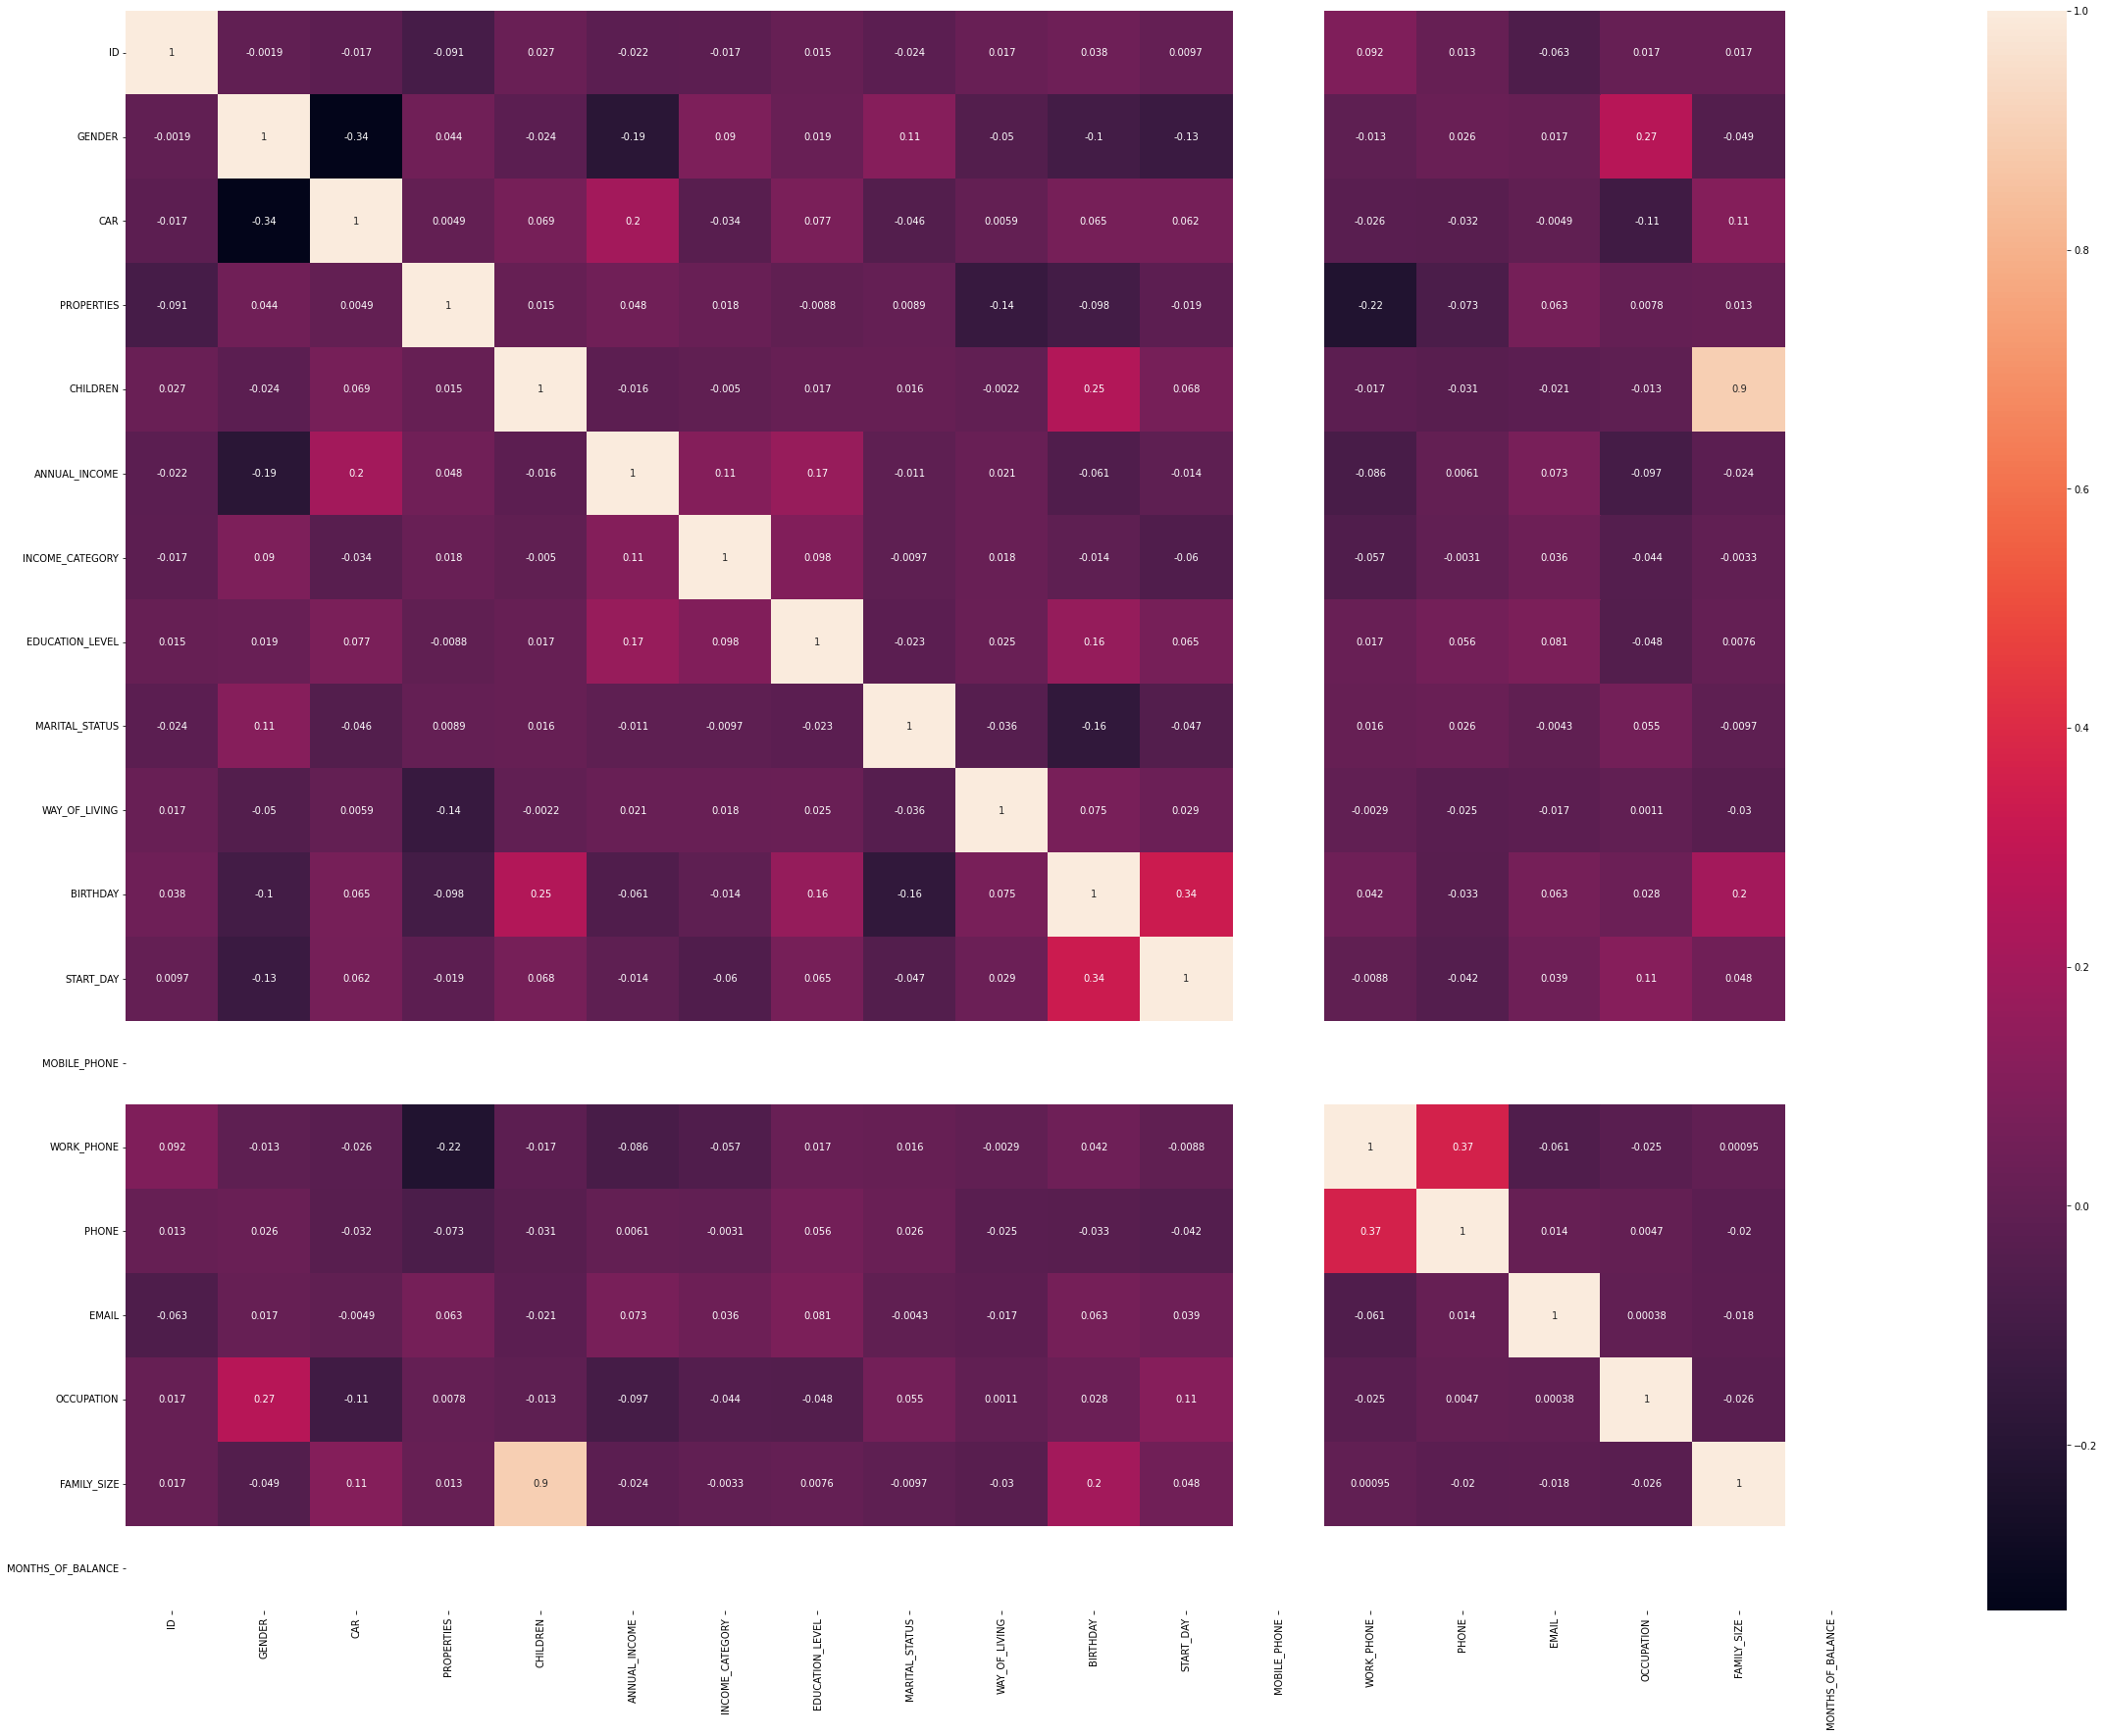

In [ ]:
#Vemos la relación entre variables
plt.figure(figsize=(40, 30))

vg_corr = df_limpio1.corr()
sns.heatmap(vg_corr, 
            xticklabels = vg_corr.columns.values,
            yticklabels = vg_corr.columns.values,
            annot = True);

In [ ]:
#Creamos un sub-dataframe sobre educación 
academic = df_limpio["EDUCATION_LEVEL_Academic degree"].value_counts()
academic2= df_limpio["EDUCATION_LEVEL_Higher education"].value_counts()
academic3 = df_limpio["EDUCATION_LEVEL_Incomplete higher"].value_counts()
academic4 = df_limpio["EDUCATION_LEVEL_Lower secondary"].value_counts()
academic5= df_limpio["EDUCATION_LEVEL_Secondary / secondary special"].value_counts()
df_education = pd.DataFrame([academic,academic2,academic3,academic4,academic5])
df_education

,0,1
EDUCATION_LEVEL_Academic degree,17033,10
EDUCATION_LEVEL_Higher education,12239,4804
EDUCATION_LEVEL_Incomplete higher,16383,660
EDUCATION_LEVEL_Lower secondary,16911,132
EDUCATION_LEVEL_Secondary / secondary special,5606,11437


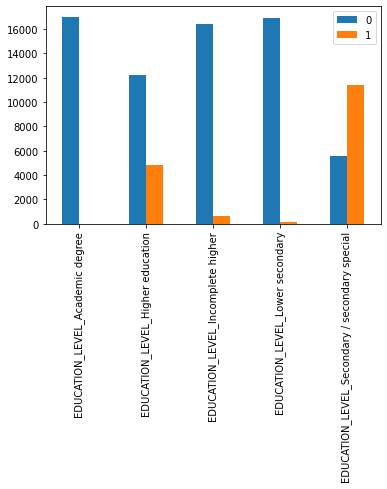

In [ ]:
#Vemos como se comporta cada variable
df_education.plot.bar()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


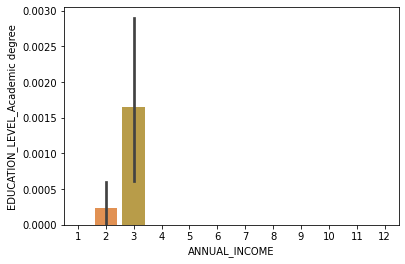

In [ ]:
#Relacionamos EDUCATION con ANNUAL INCOME
sns.barplot(df_limpio["ANNUAL_INCOME"], df_limpio['EDUCATION_LEVEL_Academic degree'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


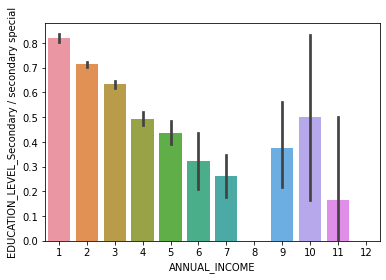

In [ ]:
sns.barplot(df_limpio["ANNUAL_INCOME"], df_limpio['EDUCATION_LEVEL_Secondary / secondary special'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


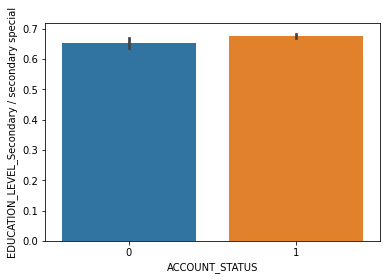

In [ ]:
#Relacionamos EDUCATION con ANNUAL INCOME
sns.barplot(df_limpio['ACCOUNT_STATUS'], df_limpio['EDUCATION_LEVEL_Secondary / secondary special'])

In [ ]:
pd.crosstab(df_limpio["ACCOUNT_STATUS"], df_limpio["INCOME_CATEGORY_Working"])

INCOME_CATEGORY_Working,0,1
ACCOUNT_STATUS,,
0,1210,1976
1,5232,8625


In [ ]:
pd.crosstab(df_limpio["ACCOUNT_STATUS"], df_limpio["ANNUAL_INCOME"])

ANNUAL_INCOME,1,2,3,4,5,6,7,8,9,10,11,12
ACCOUNT_STATUS,,,,,,,,,,,,
0,309,1554,913,263,94,19,19,4,6,2,3,0
1,1546,6742,3915,1136,341,43,76,20,26,4,3,5


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


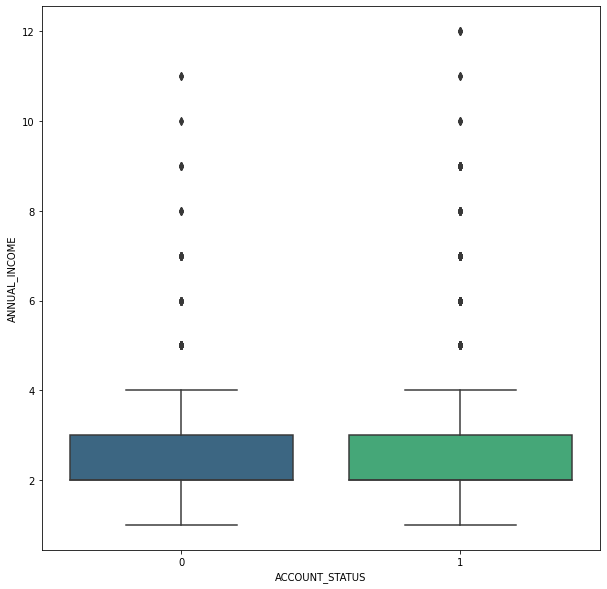

In [ ]:
plt.figure(figsize=(10,10))
plt.rcParams['figure.figsize'] = (12, 9)
sns.boxplot(df_limpio['ACCOUNT_STATUS'], df_limpio['ANNUAL_INCOME'], palette = 'viridis')
plt.show()

#MONTHS_BALANCE significa de que mes es el resumen de cuenta. 0 es el mes actual, -1 es el mes anterior, etc.
#STATUS significa si status de la cuenta y del pago.Significados:
  #0: 1-29 días de atraso 
  #1: 30-59 días de atraso 
  #2: 60-89 días de atraso  
  #3: 90-119 días de atraso 
  #4: 120-149 días de atraso 
  #5: Deudas atrasadas o incobrables,canceladas por más de 150 días
  #6: pagado ese mes 
  #7: No hay préstamo para el mes

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


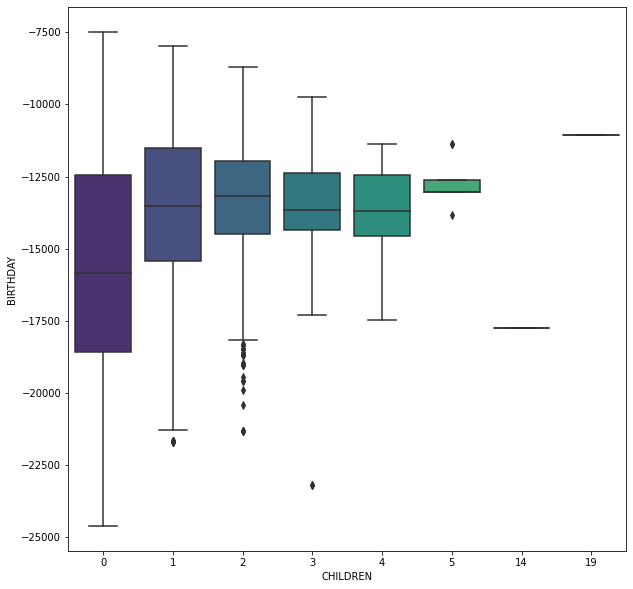

In [ ]:
plt.figure(figsize=(10,10))
plt.rcParams['figure.figsize'] = (12, 9)
sns.boxplot(df_limpio['CHILDREN'], df_limpio['BIRTHDAY'], palette = 'viridis')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<function matplotlib.pyplot.show>

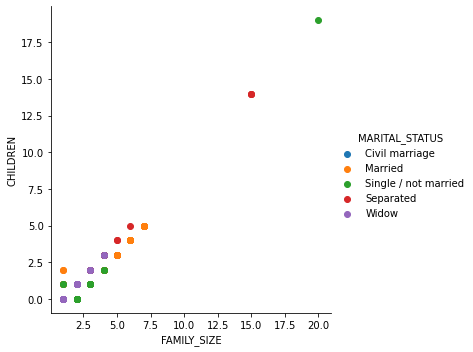

In [ ]:
sns.FacetGrid(df, hue="MARITAL_STATUS", size= 5).map(plt.scatter,"FAMILY_SIZE", "CHILDREN").add_legend();
plt.show

**ALGORITMOS DE CLASIFICACIÓN**

A continuación se desarrollarán y entrenaran los modelos de clasificación para lograr el objetivo final del trabajo. Los algoritmos que se utilizarán son los siguientes: 

- Árbol de decisión
- RandomForest
- KNN
- Regresión Logistica

In [ ]:
df_limpio1.value_counts("ACCOUNT_STATUS")

ACCOUNT_STATUS
1    13857
0     3186
dtype: int64

In [ ]:
#Separamos los datos de entrada de la salida

X = df_limpio1.drop(['ACCOUNT_STATUS'], axis=1)
y = df_limpio1['ACCOUNT_STATUS']

In [ ]:
#Importamos libreria y separamos train y test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42) 

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
#Importamos el modelo de árbol de decision
from sklearn.tree import DecisionTreeClassifier
creditcard_tree = DecisionTreeClassifier(max_depth=4, random_state = 42)

In [ ]:
#Entrenamos el modelo
creditcard_tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [ ]:
y_train_pred = creditcard_tree.predict(X_train) #Prediccion en Train
y_test_pred = creditcard_tree.predict(X_test) #Prediccion en Test

In [ ]:
#Generamos la matriz de confusión
from sklearn.metrics import confusion_matrix
matriz = confusion_matrix(y_test, y_test_pred)
print('Matriz de Confusión:')
print(matriz)

Matriz de Confusión:
[[   4  962]
 [   2 4145]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


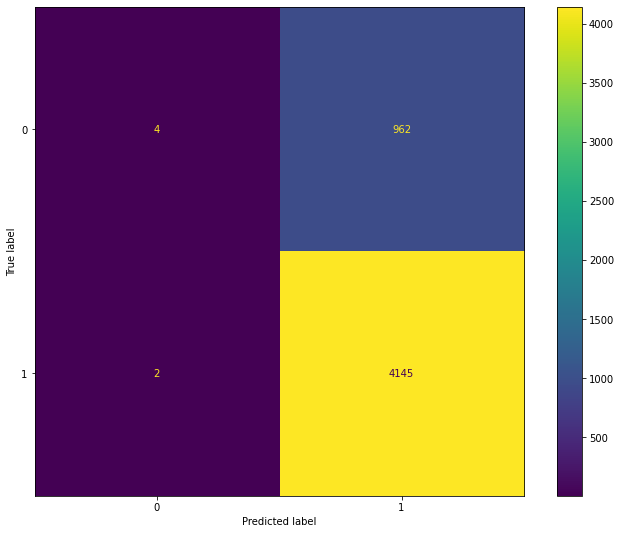

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(creditcard_tree, X_test, y_test)
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score

#Calculamos el accuracy en Train y Test
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print('El % de exactitud sobre el set de entrenamiento es:', train_accuracy)
print('El % de exactitud sobre el set de evaluación es:',test_accuracy)

El % de exactitud sobre el set de entrenamiento es: 0.8150880134115674
El % de exactitud sobre el set de evaluación es: 0.8114609818110698


Sin entrenar: ROC AUC=0.500
Regresión Logística: ROC AUC=0.764


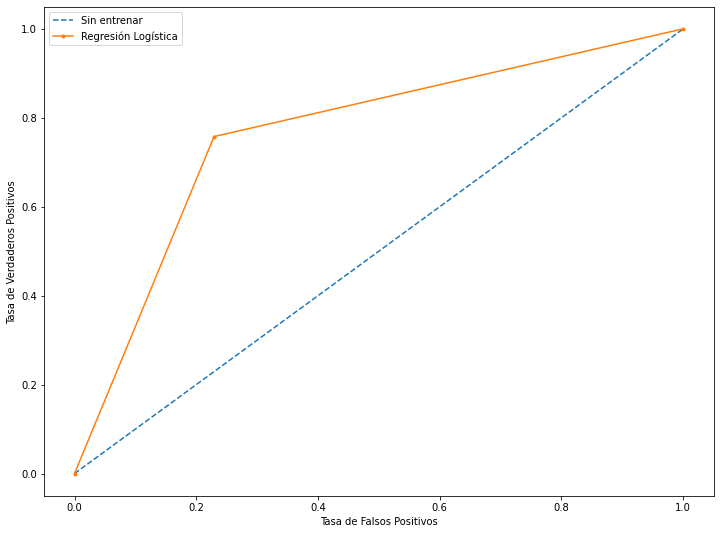

In [ ]:
from sklearn.datasets import make_classification
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

X, y = make_classification(n_samples=1000, n_classes=2, random_state=1)
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=2)

#Generamos un clasificador sin entrenar , que asignará 0 a todo
ns_probs = [0 for _ in range(len(testy))]
# Entrenamos nuestro modelo de reg log
model = DecisionTreeClassifier()
model.fit(trainX, trainy)
# Predecimos las probabilidades
lr_probs = model.predict_proba(testX)
#Nos quedamos con las probabilidades de la clase positiva (la probabilidad de 1)
lr_probs = lr_probs[:, 1]
# Calculamos el AUC
ns_auc = roc_auc_score(testy, ns_probs)
lr_auc = roc_auc_score(testy, lr_probs)
# Imprimimos en pantalla
print('Sin entrenar: ROC AUC=%.3f' % (ns_auc))
print('Regresión Logística: ROC AUC=%.3f' % (lr_auc))
# Calculamos las curvas ROC
ns_fpr, ns_tpr, _ = roc_curve(testy, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(testy, lr_probs)
# Pintamos las curvas ROC
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Sin entrenar')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Regresión Logística')
# Etiquetas de los ejes
pyplot.xlabel('Tasa de Falsos Positivos')
pyplot.ylabel('Tasa de Verdaderos Positivos')
pyplot.legend()
pyplot.show()

**RANDOM FOREST**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
model_randomf = RandomForestClassifier(random_state=11, n_estimators=100,
                               min_samples_split=5, max_features="log2")
model_randomf.fit(X_train, y_train)

RandomForestClassifier(max_features='log2', min_samples_split=5,
                       random_state=11)

In [ ]:
y_test_pred = model_randomf.predict(X_test) #Prediccion en Test

In [ ]:
from sklearn.metrics import accuracy_score

# Accuracy
print(f"Accuracy of the classifier is: {accuracy_score(y_test, y_test_pred )}")

Accuracy of the classifier is: 0.8091140230784275


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


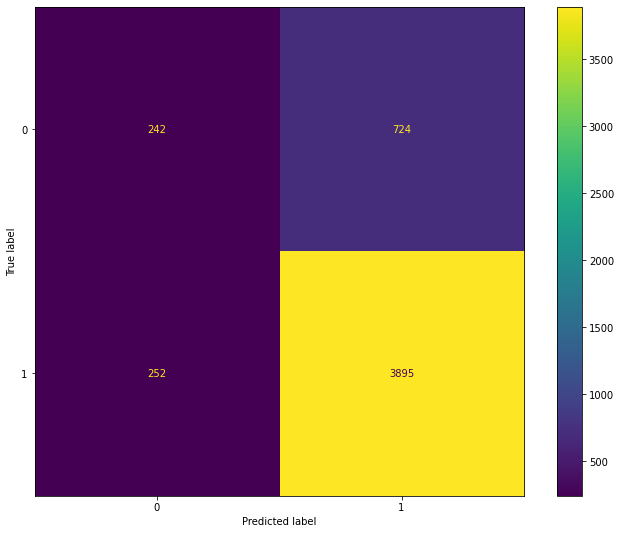

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model_randomf, X_test, y_test)
plt.show()

Sin entrenar: ROC AUC=0.500
Regresión Logística: ROC AUC=0.905


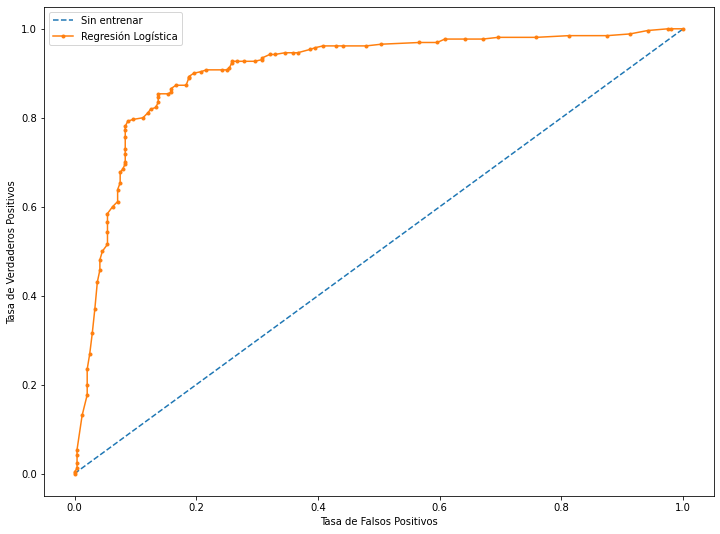

In [ ]:
from sklearn.datasets import make_classification
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

X, y = make_classification(n_samples=1000, n_classes=2, random_state=1)
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=2)

#Generamos un clasificador sin entrenar , que asignará 0 a todo
ns_probs = [0 for _ in range(len(testy))]
# Entrenamos nuestro modelo de reg log
model = RandomForestClassifier()
model.fit(trainX, trainy)
# Predecimos las probabilidades
lr_probs = model.predict_proba(testX)
#Nos quedamos con las probabilidades de la clase positiva (la probabilidad de 1)
lr_probs = lr_probs[:, 1]
# Calculamos el AUC
ns_auc = roc_auc_score(testy, ns_probs)
lr_auc = roc_auc_score(testy, lr_probs)
# Imprimimos en pantalla
print('Sin entrenar: ROC AUC=%.3f' % (ns_auc))
print('Regresión Logística: ROC AUC=%.3f' % (lr_auc))
# Calculamos las curvas ROC
ns_fpr, ns_tpr, _ = roc_curve(testy, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(testy, lr_probs)
# Pintamos las curvas ROC
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Sin entrenar')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Regresión Logística')
# Etiquetas de los ejes
pyplot.xlabel('Tasa de Falsos Positivos')
pyplot.ylabel('Tasa de Verdaderos Positivos')
pyplot.legend()
pyplot.show()

In [ ]:
#Comparamos modelos
creditcard_tree = DecisionTreeClassifier(max_depth=2, random_state = 50)
modelos = [creditcard_tree, model_randomf]

In [ ]:
for i in modelos:
  modelos=i
  modelos.fit(X_train,y_train)
  y_pred=modelos.predict(X_test)
  print(accuracy_score(y_test,y_pred))

#Vemos que para nuestro dataset, tenemos mayor accuracy con Árbol de Decisión 

0.8110698220222962
0.8091140230784275


**KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf=KNeighborsClassifier()
knn_clf.fit(X_train,y_train)
ypred=knn_clf.predict(X_test)

In [ ]:
n_neighbors = 17
 
knn = KNeighborsClassifier(n_neighbors)
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.82
Accuracy of K-NN classifier on test set: 0.81


([<matplotlib.axis.XTick at 0x7f049fbe3c10>,
 <a list of 5 Text major ticklabel objects>)

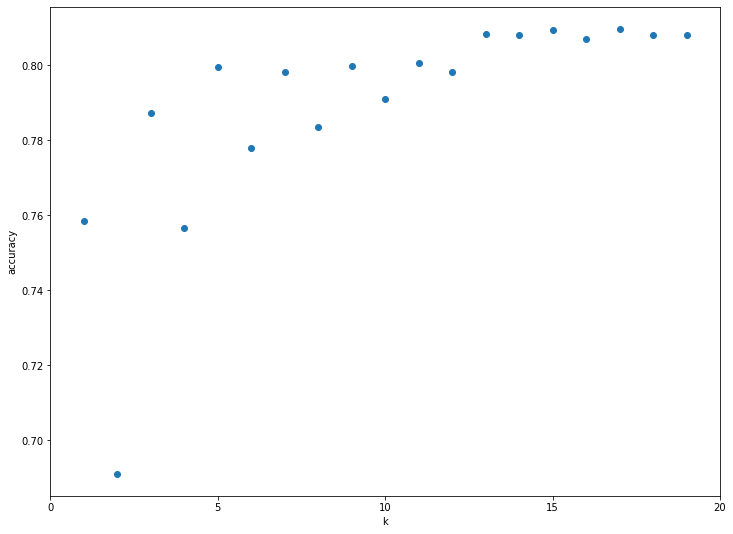

In [ ]:
#Vemos con que K se logra mayor presicion
k_range = range(1, 20)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


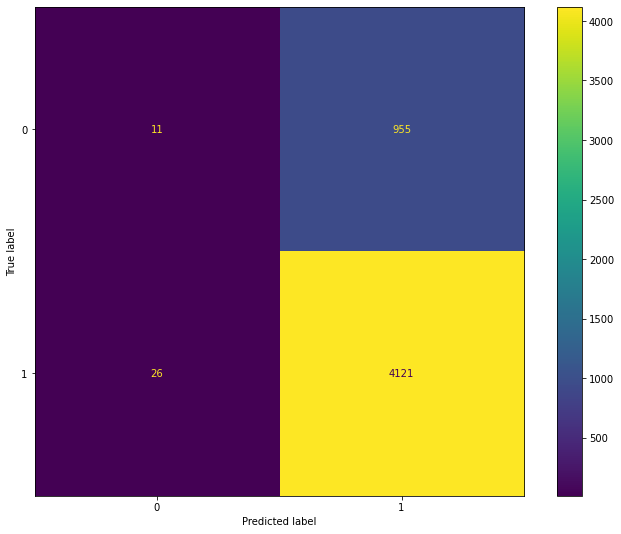

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(knn, X_test, y_test)
plt.show()

Sin entrenar: ROC AUC=0.500
Regresión Logística: ROC AUC=0.851


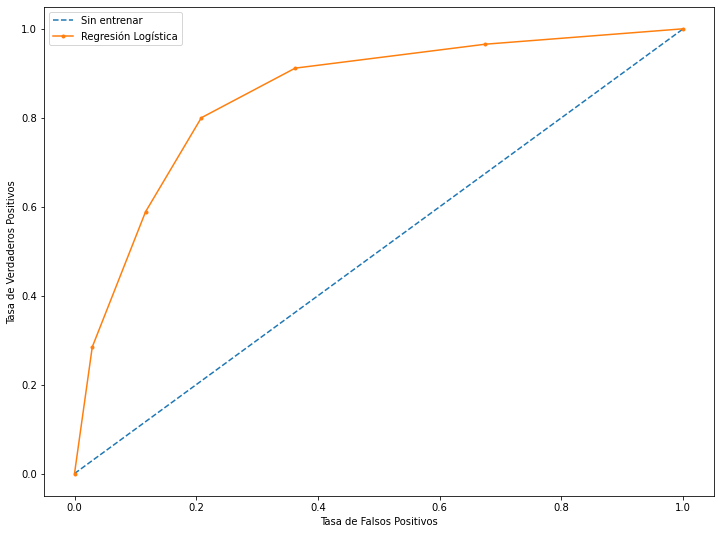

In [ ]:
from sklearn.datasets import make_classification
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

X, y = make_classification(n_samples=1000, n_classes=2, random_state=1)
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=2)

#Generamos un clasificador sin entrenar , que asignará 0 a todo
ns_probs = [0 for _ in range(len(testy))]
# Entrenamos nuestro modelo de reg log
model = KNeighborsClassifier()
model.fit(trainX, trainy)
# Predecimos las probabilidades
lr_probs = model.predict_proba(testX)
#Nos quedamos con las probabilidades de la clase positiva (la probabilidad de 1)
lr_probs = lr_probs[:, 1]
# Calculamos el AUC
ns_auc = roc_auc_score(testy, ns_probs)
lr_auc = roc_auc_score(testy, lr_probs)
# Imprimimos en pantalla
print('Sin entrenar: ROC AUC=%.3f' % (ns_auc))
print('Regresión Logística: ROC AUC=%.3f' % (lr_auc))
# Calculamos las curvas ROC
ns_fpr, ns_tpr, _ = roc_curve(testy, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(testy, lr_probs)
# Pintamos las curvas ROC
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Sin entrenar')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Regresión Logística')
# Etiquetas de los ejes
pyplot.xlabel('Tasa de Falsos Positivos')
pyplot.ylabel('Tasa de Verdaderos Positivos')
pyplot.legend()
pyplot.show()

**LOGISTIC REGRESSION**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model

In [ ]:
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, solver='liblinear')

In [ ]:
LR_test = LR.predict(X_test)
LR_test

array(['1', '1', '1', ..., '1', '1', '1'], dtype=object)

In [ ]:
LR_prob = LR.predict_proba(X_test)
LR_prob

array([[0.1884641 , 0.8115359 ],
       [0.23463851, 0.76536149],
       [0.1654538 , 0.8345462 ],
       ...,
       [0.20093742, 0.79906258],
       [0.21269743, 0.78730257],
       [0.15480628, 0.84519372]])

In [ ]:
from sklearn.metrics import log_loss
log_loss(y_test, LR_prob)

0.4839624554819514

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


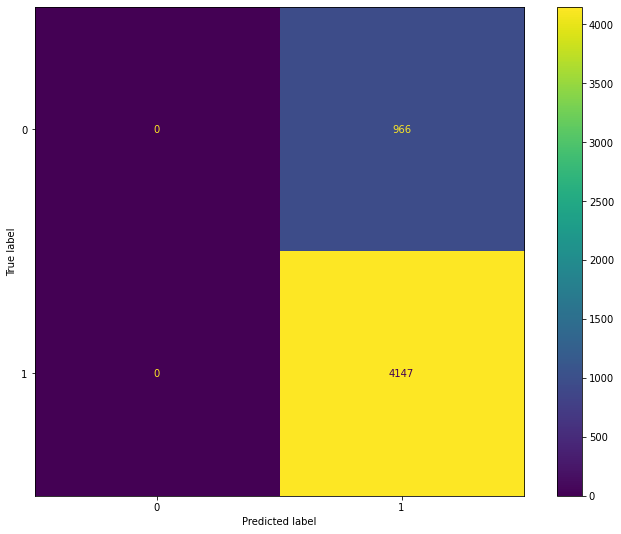

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(LR, X_test, y_test)
plt.show()

Sin entrenar: ROC AUC=0.500
Regresión Logística: ROC AUC=0.903


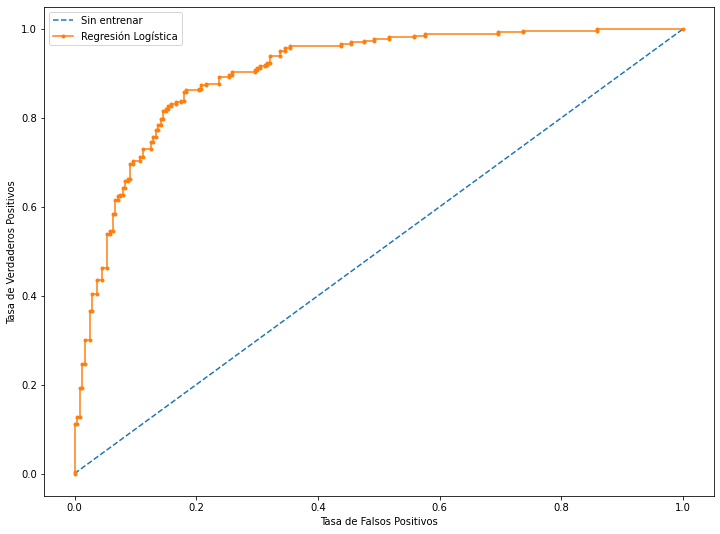

In [ ]:
from sklearn.datasets import make_classification
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

X, y = make_classification(n_samples=1000, n_classes=2, random_state=1)
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=2)

#Generamos un clasificador sin entrenar , que asignará 0 a todo
ns_probs = [0 for _ in range(len(testy))]
# Entrenamos nuestro modelo de reg log
model = LogisticRegression()
model.fit(trainX, trainy)
# Predecimos las probabilidades
lr_probs = model.predict_proba(testX)
#Nos quedamos con las probabilidades de la clase positiva (la probabilidad de 1)
lr_probs = lr_probs[:, 1]
# Calculamos el AUC
ns_auc = roc_auc_score(testy, ns_probs)
lr_auc = roc_auc_score(testy, lr_probs)
# Imprimimos en pantalla
print('Sin entrenar: ROC AUC=%.3f' % (ns_auc))
print('Regresión Logística: ROC AUC=%.3f' % (lr_auc))
# Calculamos las curvas ROC
ns_fpr, ns_tpr, _ = roc_curve(testy, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(testy, lr_probs)
# Pintamos las curvas ROC
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Sin entrenar')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Regresión Logística')
# Etiquetas de los ejes
pyplot.xlabel('Tasa de Falsos Positivos')
pyplot.ylabel('Tasa de Verdaderos Positivos')
pyplot.legend()
pyplot.show()

In [ ]:
# GridSearchCV - RandomizedSearchCV - 

#GridSearchCV le entregamos una grilla y empieza a buscar la mejor opcion dentro de la grilla
#Randomized recorre esa grilla de forma aleatoria

In [ ]:
#Importamos librerias y el Dataset
import os
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

In [ ]:
#Creamos un df para analizar los resultados
cols = ['Case','SVM','RndForest','LogReg','DescTree']
resul = pd.DataFrame(columns=cols)
resul.set_index("Case",inplace=True)
resul.loc['Standard'] = [0,0,0,0]
resul.loc['GridSearch'] = [0,0,0,0]
resul.head()

,SVM,RndForest,LogReg,DescTree
Case,,,,
Standard,0,0,0,0
GridSearch,0,0,0,0


In [ ]:
features = df_limpio.drop(["ACCOUNT_STATUS"], axis =1)
y = df_limpio["ACCOUNT_STATUS"]

In [ ]:
X = pd.get_dummies(features)
X_train, X_valid, y_train, y_valid = train_test_split(X,y,train_size=0.70,test_size=0.30,random_state=0)

In [ ]:
#Creación de Modelos

svc   = SVC(gamma='auto')
rf    = RandomForestClassifier(n_estimators=10)
lr    = LogisticRegression(solver='liblinear')
dt   = DecisionTreeClassifier()
models = [svc,rf,lr,dt]

col = 0
for model in models:
    model.fit(X_train,y_train.values.ravel())
    resul.iloc[0,col] = model.score(X_valid,y_valid)
    col += 1

resul.head()

,SVM,RndForest,LogReg,DescTree
Case,,,,
Standard,0.813026,0.772932,0.812243,0.755525
GridSearch,0,0,0,0


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold


#Support Vector Classifier
kernel = ['poly', 'rbf']#, 'sigmoid'
C = [0.1, 0.01]#50, 10, 1.0, 
gamma = ['scale']
svc_grid = dict(kernel=kernel,C=C,gamma=gamma)

#Random Forest
n_estimators = [10, 100]#, 1000,10000
max_features = ['sqrt', 'log2']
rf_grid = dict(n_estimators=n_estimators,max_features=max_features)

#Logistic Regression
solvers = ['newton-cg']#, 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [ 1.0, 0.1, 0.01]#100, 10,
lr_grid = dict(solver=solvers,penalty=penalty,C=c_values)

#DescitionTree
max_features = ['int', 'float', 'sqrt', 'log2']
dt_grid = dict(max_features=max_features)

In [ ]:
models = [svc,rf,lr,dt]
grids = [svc_grid,rf_grid,lr_grid,dt_grid]
col = 0

for ind in range(0,len(models)):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3,random_state=1)
    grid_search = GridSearchCV(estimator=models[col], 
                  param_grid=grids[col], n_jobs=-1, cv=cv,  
                  scoring='accuracy',error_score=0)
    grid_clf_acc = grid_search.fit(X_train, y_train)
    resul.iloc[1,col] = grid_clf_acc.score(X_valid,y_valid)
    col += 1

resul.head()

# podemos ver que es practicamente el mismo resultado cuando optimizamos los hiperparametros.

/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

,SVM,RndForest,LogReg,DescTree
Case,,,,
Standard,0.813026,0.772932,0.812243,0.755525
GridSearch,0.812243,0.775083,0.812243,0.750244
